ひび割れを抽出するアプリケーションである。
用いた技術：メディアンフィルタ、背景差分処理、閾値処理
アピールポイント：ひび割れ箇所に影が重なっていても関係なくひび割れを抽出することができる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

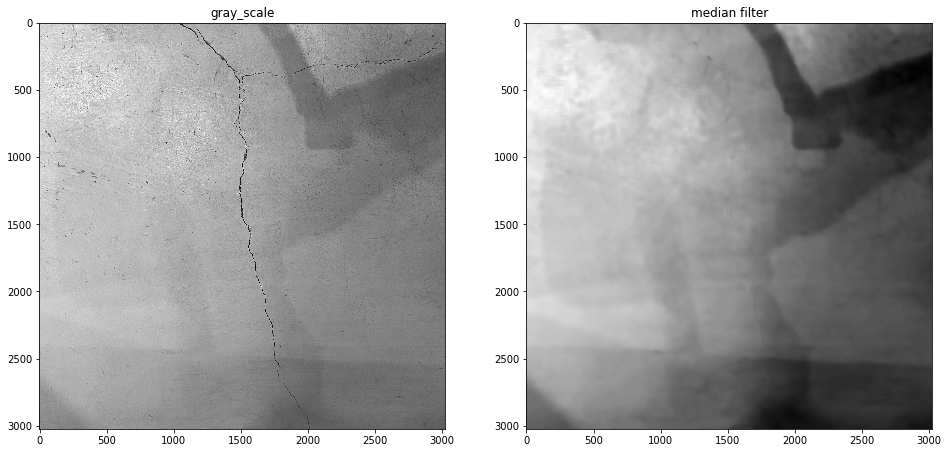

In [5]:
crack = cv2.imread("./data/crack.jpg")
crack_rgb = cv2.cvtColor(crack,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(crack_rgb,cv2.COLOR_BGR2GRAY)
cv2.imwrite("./data/gray.jpg",gray)

kernelSize = 45
dst = cv2.medianBlur(gray,kernelSize)
cv2.imwrite("./data/filter.jpg",dst)

fig = plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.imshow(gray)
plt.title("gray_scale")

plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("median filter")

plt.gray()
plt.show()

光の当たり具合や影などにより濃淡変化が生じているので、メディアンフィルタにより補正用画像（平滑化画像）を生成する。

(3024, 3024)


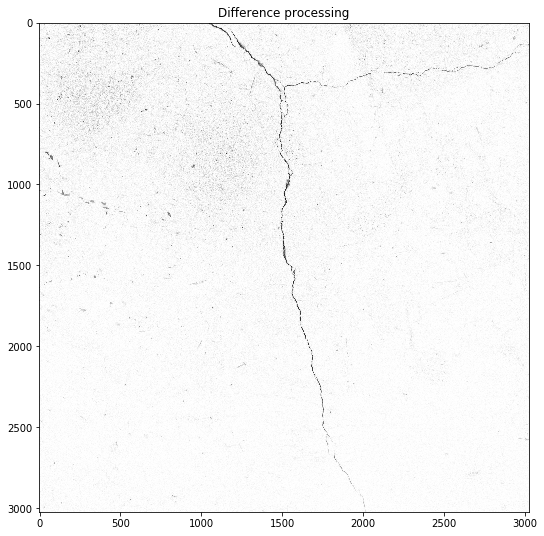

In [3]:
crack = cv2.imread("./data/gray.jpg",0)
dst = cv2.imread("./data/filter.jpg",0)
print(crack.shape)

mask = cv2.absdiff(gray,dst)
mask = cv2.bitwise_not(mask)

cv2.imwrite("./data/mask.jpg",mask)


fig2 = plt.figure(figsize=(16,9))
plt.imshow(mask)
plt.gray()
plt.title("Difference processing")
plt.show()

背景差分処理により二つの画像の差をとることで光の当たり具合や影などの影響を抑制する。

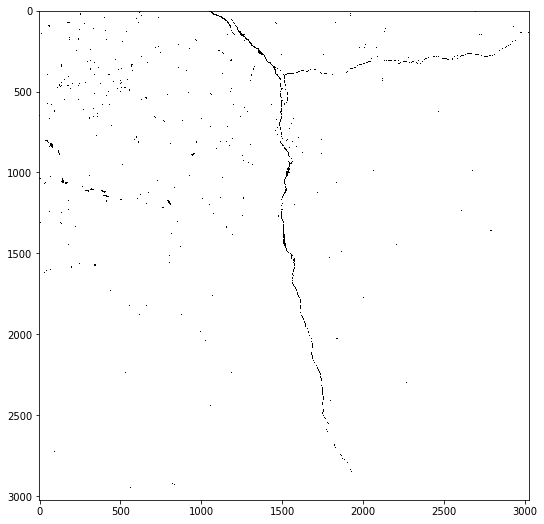

In [12]:
ret,th1 = cv2.threshold(mask,200,255,cv2.THRESH_BINARY)

plt.figure(figsize=(16,9))
plt.imshow(th1)


閾値100を超えた箇所を255にすることによってひび割れ個所を抽出している。